# GPA predictor project

This project focuses on predicting students' Grade Point Average (GPA) using deep learning models implemented in both TensorFlow/Keras and PyTorch frameworks. The dataset used for this analysis includes various features such as study time, attendance rates, and demographic information, which influence academic performance.

The notebook contains code for building, training, and evaluating two distinct neural network models for regression tasks. The TensorFlow/Keras model employs a deep neural network (DNN) with five hidden layers, while the PyTorch implementation uses a simpler architecture with three layers. Both models were evaluated based on their performance metrics, including R² score and Mean Squared Error (MSE), to compare their effectiveness.

This project provides insights into the application of deep learning frameworks for educational data analysis and highlights the strengths and trade-offs of TensorFlow/Keras and PyTorch in solving similar problems.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import torch
from torch import nn

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Deep_learning_final_exam/'

/content/drive/My Drive/Deep_learning_final_exam


In [4]:
data = pd.read_csv('Student_performance_data _.csv')

## Explore the dataset

In [5]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
data.shape

(2392, 15)

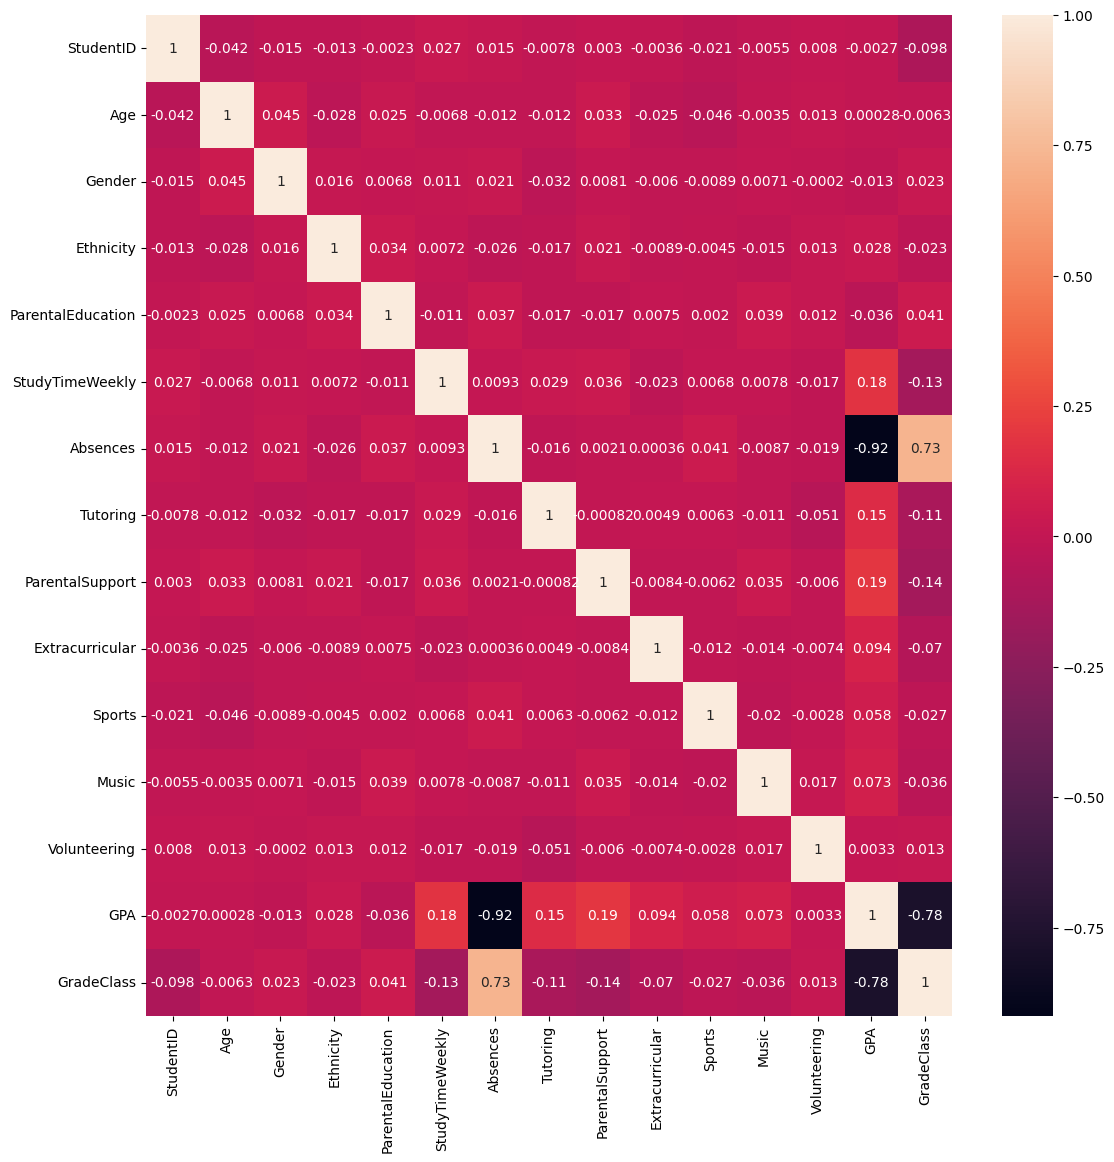

In [8]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True);

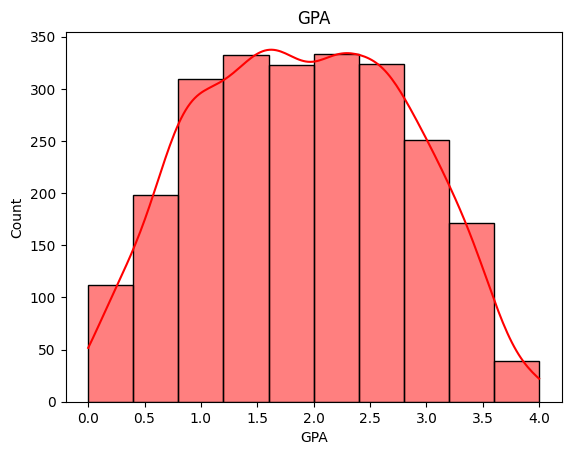

In [9]:
plt.title('GPA')
sns.histplot(data['GPA'],kde=True,bins=10,color='r');

## Data preprocessing

We observed that the `StudentID` column has no impact on predicting GPA and can be safely removed.

Additionally, we created a copy of the dataset (`data2`) for the PyTorch implementation to ensure both approaches work independently without interfering with each other.

In [10]:
# Dropping irrelevant columns
data = data.drop(['StudentID'], axis=1)
data2 = data.copy()

## Tensorflow/keras Model

We shuffled the data to distribute the observations randomly. This ensures that the model trains on a representative sample of the data and avoids any potential bias caused by the initial order of the dataset.

In [11]:
# Shuffle data before splitting
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

We applied normalization to all features using the `MinMaxScaler` from `sklearn`. This method scales the feature values to a range between 0 and 1, which improves the convergence of machine learning algorithms. The target variable, `GPA`, was not transformed as it is the variable to predict.

In [12]:
from sklearn.preprocessing import MinMaxScaler

x = data.drop('GPA', axis=1)
y = data['GPA']
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = y


We split our dataset into three parts: a training set (70%), a validation set (15%), and a test set (15%). This approach allows us to train the model on part of the data while reserving the validation and test sets for independent performance evaluation. The `train_test_split` function from `sklearn` was used for this split.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### Build the first model

We built a neural network model using TensorFlow/Keras. The model consists of multiple fully connected (`Dense`) layers and regularization layers (`Dropout`) to reduce `overfitting`. Here are the details of the model:

* First Dense Layer: 256 neurons with ReLU activation, and L2 regularization (lambda = 0.01) to prevent overfitting.
* Dropout Layer: Randomly drops 20% of neurons to enhance generalization.
* Second Dense Layer: 128 neurons with ReLU activation and the same L2 regularization.
* Second Dropout Layer: Also drops 20% of neurons.
* Third Dense Layer: 64 neurons with ReLU activation.
* Fourth Dense Layer: 32 neurons with ReLU activation.
* Fifth Dense Layer: 16 neurons with ReLU activation.
* Final Dense Layer: 1 neuron without activation, used to predict the continuous GPA value.

The `model.summary()` function provides a detailed view of the model's structure and the total number of trainable parameters.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

The model is compiled with the `adam` optimizer, `mean_squared_error` loss function, and `mean_absolute_error` metric. An early stopping callback is used to monitor `val_loss` and stop training if it doesn't improve for 10 epochs, restoring the best weights.

In [15]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


# Callback for early shutdown
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



We can incorporate our validation set into the training process by including the `validation_data=(x_val,y_val)` argument in the .fit method.

In [16]:
# train the model
EPOCHS = 30
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[early_stopping])

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 5.1096 - mean_absolute_error: 1.6043 - val_loss: 1.9073 - val_mean_absolute_error: 0.7707
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5930 - mean_absolute_error: 0.6519 - val_loss: 0.9053 - val_mean_absolute_error: 0.3655
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8380 - mean_absolute_error: 0.3568 - val_loss: 0.5606 - val_mean_absolute_error: 0.2342
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5404 - mean_absolute_error: 0.2601 - val_loss: 0.3982 - val_mean_absolute_error: 0.1999
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4114 - mean_absolute_error: 0.2513 - val_loss: 0.3209 - val_mean_absolute_error: 0.2135
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3184 - mean_absolute_error: 0.2318 - val_loss: 0.2424 - val_mean_absolute_error: 0.1805
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2537 - mean_absolute_error: 0.2176 - val_loss: 0.20

#### Evaluate loss and Test MAE on the test set

Now let's see how the model performs on the test set.

In [17]:
# Evaluate the model on data test
loss, mae = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0637 - mean_absolute_error: 0.1622 

Test Loss: 0.0583
Test MAE: 0.1540


### Loss and Validation plot

Now we plot:

the first subplot shows the training and validation loss over epochs, and the second subplot displays the training and validation mean absolute error (MAE). It helps visualize the model's performance and generalization over time, comparing the training and validation metrics.

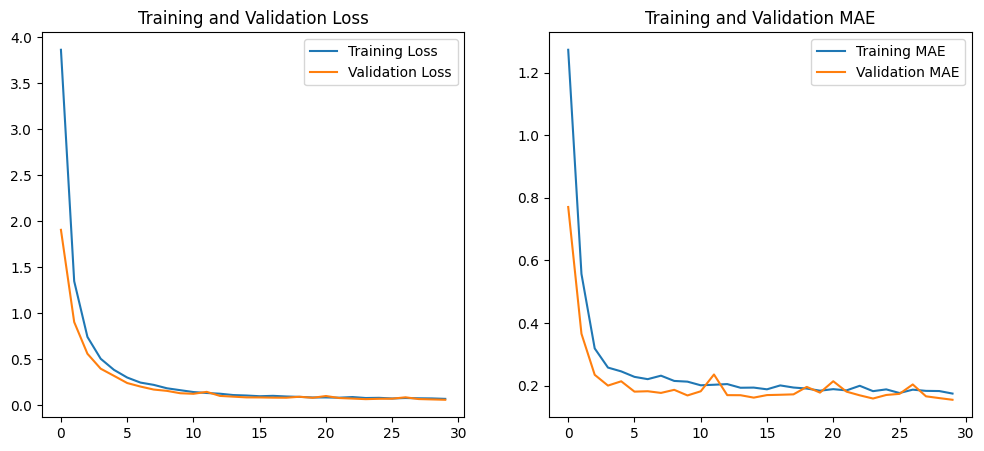

In [18]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mean_absolute_error']
validation_mae = history.history['val_mean_absolute_error']

epochs_range = range(len(training_loss))

plt.figure(figsize=(12, 5))

# plot of loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# plot of  MAE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_mae, label='Training MAE')
plt.plot(epochs_range, validation_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')

plt.show()

### Predictions

In [28]:
y_pred = model.predict(x_test)

# Displaying predictions and actual values
for i in range(10):
    print(f"Prediction: {y_pred[i][0]:.2f}, real values: {y_test.iloc[i]:.2f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediction: 1.58, real values: 1.89
Prediction: 2.23, real values: 1.90
Prediction: 2.26, real values: 1.65
Prediction: 1.94, real values: 1.76
Prediction: 3.19, real values: 3.30
Prediction: 1.03, real values: 0.96
Prediction: 1.05, real values: 0.74
Prediction: 1.41, real values: 1.12
Prediction: 1.36, real values: 1.47
Prediction: 1.88, real values: 1.67


# GPA predictor with pytorch

## Data preprocessing

To begin, we split `data2` into training and testing sets, with 70% of the data allocated to the training set and the remaining 30% to the test set.

In [20]:
# split into train and test sets
train_size = int(len(data) * 0.7)
train = data2.iloc[:train_size, :]
test = data2.iloc[train_size:, :]


Now, we extract the features `X_train` and target `y_train2` from the training data by dropping the `GPA` column and converting them to NumPy arrays. We then convert these arrays to PyTorch tensors for training. The same process is repeated for the test data, where we extract features `X_test` and target `y_test2`, and convert them into PyTorch tensors as well.

In [21]:
X_train = train.drop(columns=['GPA']).to_numpy()
y_train2 = train['GPA'].to_numpy()

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train2 = torch.tensor(y_train2, dtype=torch.float32)

X_test = test.drop(columns=['GPA']).to_numpy()
y_test2 = test['GPA'].to_numpy()

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test2 = torch.tensor(y_test2, dtype=torch.float32)

We have to reshape the target variables `y_train2` and `y_test2` into column vectors with a shape of `[-1, 1]`, ensuring they are in the correct format for training and evaluation in PyTorch.

In [22]:
y_train2 = y_train2.reshape([-1, 1])
y_test2 = y_test2.reshape([-1, 1])

#### Build the pytorch model

To begin the model, we define the `GPA_Predictor` class as a neural network model using PyTorch. The model consists of three fully connected layers (`fc1, fc2, and fc3`), with ReLU activation functions applied after the first two layers. The final layer outputs a single value, representing the predicted GPA.

In [23]:
class GPA_Predictor(nn.Module):
    def __init__(self, input_size):
        super(GPA_Predictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [24]:
import torch.optim as optim

We instantiate the `GPA_Predictor` model with the input size based on the number of features in `X_train`. The mean squared error `MSELoss` is used as the loss function, and the Adam optimizer is applied with a learning rate of 0.01. Over 250 epochs, the model is trained by performing forward passes, calculating the `loss`, and updating the model's weights using backpropagation and the optimizer. Every 10 epochs, the current loss is printed.


In [25]:
model1 = GPA_Predictor(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

epochs = 250
for epoch in range(epochs):
    model1.train()

    outputs = model1(X_train)
    loss = criterion(outputs, y_train2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/250], Loss: 0.1674
Epoch [20/250], Loss: 0.1024
Epoch [30/250], Loss: 0.0876
Epoch [40/250], Loss: 0.0732
Epoch [50/250], Loss: 0.0662
Epoch [60/250], Loss: 0.0633
Epoch [70/250], Loss: 0.0621
Epoch [80/250], Loss: 0.0613
Epoch [90/250], Loss: 0.0604
Epoch [100/250], Loss: 0.0598
Epoch [110/250], Loss: 0.0591
Epoch [120/250], Loss: 0.0585
Epoch [130/250], Loss: 0.0578
Epoch [140/250], Loss: 0.0572
Epoch [150/250], Loss: 0.0565
Epoch [160/250], Loss: 0.0557
Epoch [170/250], Loss: 0.0550
Epoch [180/250], Loss: 0.0542
Epoch [190/250], Loss: 0.0534
Epoch [200/250], Loss: 0.0526
Epoch [210/250], Loss: 0.0517
Epoch [220/250], Loss: 0.0507
Epoch [230/250], Loss: 0.0497
Epoch [240/250], Loss: 0.0486
Epoch [250/250], Loss: 0.0475


We define a custom function `r2_score` to compute the `R² score`, which measures the proportion of variance explained by the model. In evaluation mode `model1.eval()`, we use the model to predict outputs for the test set `X_test` and calculate the `R² score` between the predictions `test_outputs` and the true values `y_test2`. The `R² score` is then printed to evaluate the model's performance on the test data.

In [26]:
def r2_score(y_pred, y_true):
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2.item()


model1.eval()
with torch.no_grad():
    test_outputs = model1(X_test)
    test_loss = r2_score(test_outputs, y_test2)
    print(f'Test R2 score: {test_loss:.4f}')

Test R2 score: 0.9321




we set the model to evaluation mode `model1.eval()` and make predictions on the test data `X_test` without calculating gradients using `torch.no_grad()`. The predictions `y_pred` and the true values `y_test2` are then converted from PyTorch tensors to NumPy arrays for easier readability. Finally, the first 10 predicted and actual values are printed for comparison.


In [27]:
model1.eval()

with torch.no_grad():
    # compute of  predictions
    y_pred = model1(X_test)

# Converting predictions and actual values ​​into readable format
y_pred = y_pred.cpu().numpy()
y_test_np = y_test2.cpu().numpy()

print("Displaying predictions and actual values:")
for i in range(10):  # Limite à 10 pour une lecture plus simple
    print(f"Prediction: {y_pred[i][0]:.2f}, real values: {y_test_np[i][0]:.2f}")

Affichage des prédictions et des valeurs réelles :
Prédiction: 0.90, Réalité: 0.64
Prédiction: 1.27, Réalité: 1.40
Prédiction: 1.50, Réalité: 1.43
Prédiction: 3.14, Réalité: 2.93
Prédiction: 0.32, Réalité: 0.63
Prédiction: 2.18, Réalité: 2.57
Prédiction: 0.68, Réalité: 0.40
Prédiction: 1.92, Réalité: 2.06
Prédiction: 3.04, Réalité: 3.12
Prédiction: 1.86, Réalité: 1.92


## Conclusion

This project demonstrates the application of two deep learning frameworks—TensorFlow/Keras and PyTorch—for predicting student GPA.

We can say that the prediction method with PyTorch is simpler and more flexible, requiring only the conversion of data into PyTorch tensors. In contrast, the Keras/TensorFlow model requires more layers for convergence and demands more data preparation.